### Contexto

Dragões podem viver milhares de anos e são conhecidos por cuspirem fogo. Danny, a fazendeira de dragões, vem de uma longa linhagem de criadores de dragoẽs. A mãe de Danny -- que também é sua tia -- lhe dá a tarefa de entender o que influencia o tamanho da ninhada produzida por um dragão.

Danny consulta o meistre da cidade sobre o assunto e ele lhe diz que possui um conjunto de dados de n=100 observações correspondendo a um dragão cada, coletado no ano passado.Os dados consistem nas seguintes variáveis do dragão:

Idade em anos (age);

Cor (colour);

O tamanho de suas asas de um ponta à outra em centímetros (wingspan);

Seu coeficiente de fogo, uma medida padronizada utilizada pela Associação de Criadores de Dragões de Passeio (fire_quotient). Quanto mais próximo de `1, mais calorias por minuto por grama de peso o dragão consegue produzir;

O desfecho, medido como o número de ovos postos (no_eggs).

### Objetivo

Danny precisa ser capaz de:

Entender o relacionamento entre as variáveis medidas e o desfecho: qual o efeito de cada covariável?

Qual a forma funcional deste relacionamento? 

Isso é importante pois ela precisa saber o que medir em seus próprios dragões, além é claro de saber o que preservar e o que eliminar da sua criação (melhoramento genético);


Prever o tamanho da ninhada dos dragões de sua propriedade. Os dados da Danny estão aqui. IMPORTANTE: não vale olhar os dados que ela de fato mediu para melhorar suas predições!

Ajude Danny em sua tarefa de se tornar a melhor fazendeira de dragões em Westeros! Baixe os dados em mystery_dragon.csv e mãos à obra.

### Data Observation

In [1]:
library(tidyverse)
library(GGally)  # ggpairs
library(MuMIn)  # AICc (Akaike Information Criterion corrected for small sample size)
library(MASS)  # negative.binomial
library(readr)
library(ggplot2)
library(gridExtra)

urlfile = "https://raw.githubusercontent.com/maxbiostat/stats_modelling/master/data/mystery_dragon.csv"
data <- read_csv(url(urlfile))
urlfile2 = "https://raw.githubusercontent.com/maxbiostat/stats_modelling/master/data/Dannys_dragons.csv"
data_dannys <- read_csv(url(urlfile2))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Rows: 100 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): colour
dbl (4): age, wing_span, fire_quotient, no_eggs

ℹ Use `spec()` 

In [2]:
summary(data)

      age            colour            wing_span      fire_quotient    
 Min.   : 332.6   Length:100         Min.   : 66.98   Min.   :0.01332  
 1st Qu.:1498.0   Class :character   1st Qu.:172.51   1st Qu.:0.23611  
 Median :2827.3   Mode  :character   Median :245.71   Median :0.55617  
 Mean   :2805.9                      Mean   :310.80   Mean   :0.51693  
 3rd Qu.:4030.4                      3rd Qu.:437.58   3rd Qu.:0.77795  
 Max.   :5552.9                      Max.   :690.27   Max.   :0.98925  
    no_eggs      
 Min.   :  0.00  
 1st Qu.:  1.00  
 Median :  6.50  
 Mean   : 16.19  
 3rd Qu.: 23.00  
 Max.   :145.00  

### GGpairs

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


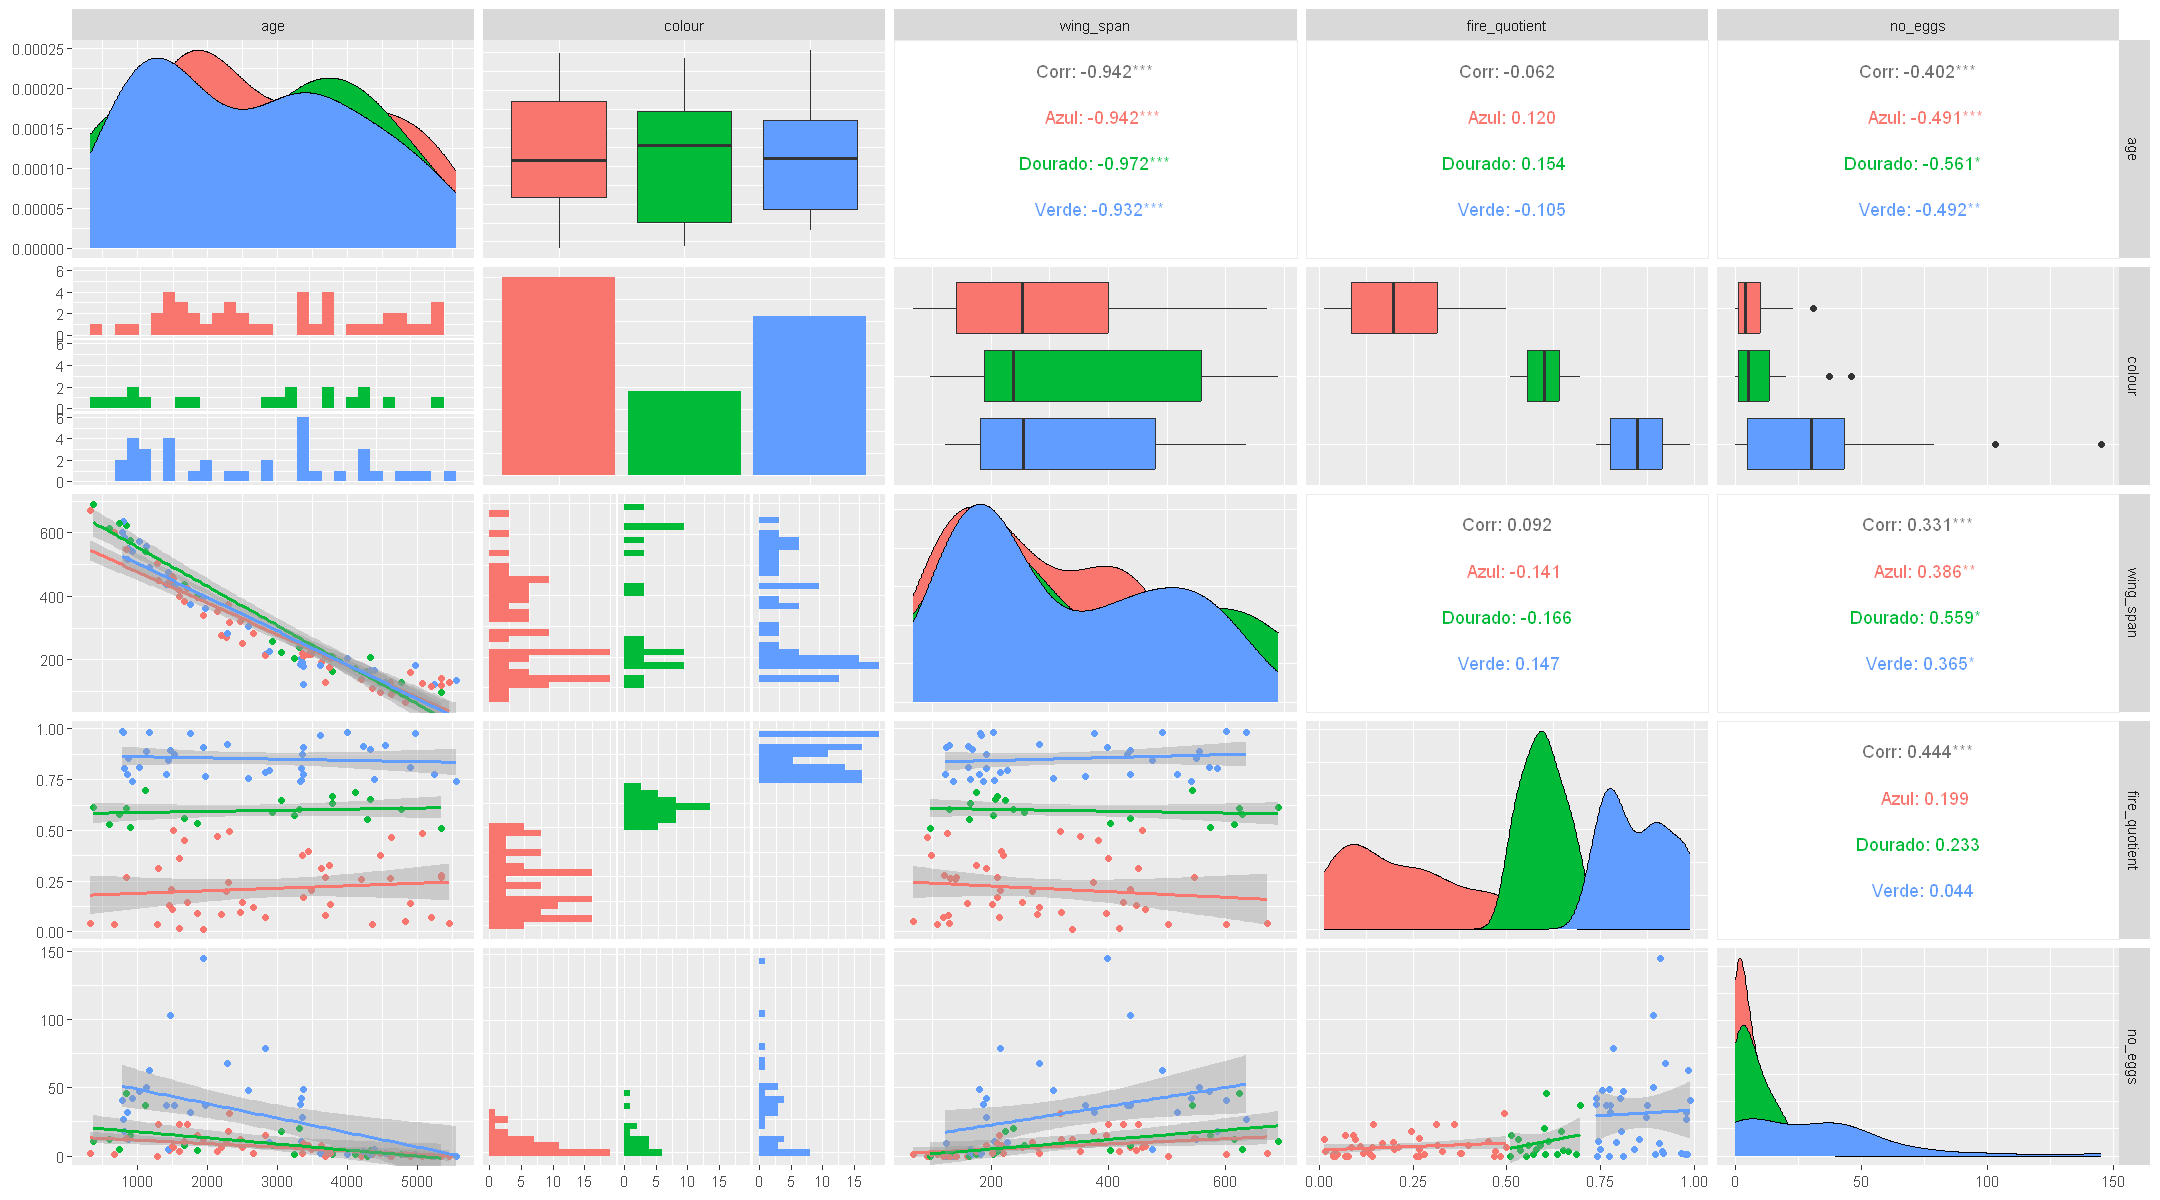

In [3]:
options(repr.plot.width = 18, repr.plot.height = 10)
ggpairs(data, columns = c("age", "colour", "wing_span", "fire_quotient", "no_eggs"),
        aes(colour = colour), lower = list(continuous = wrap("smooth", method = "lm")))

### Polinomial Linear Regression Comparison

##### Wing Span x Age

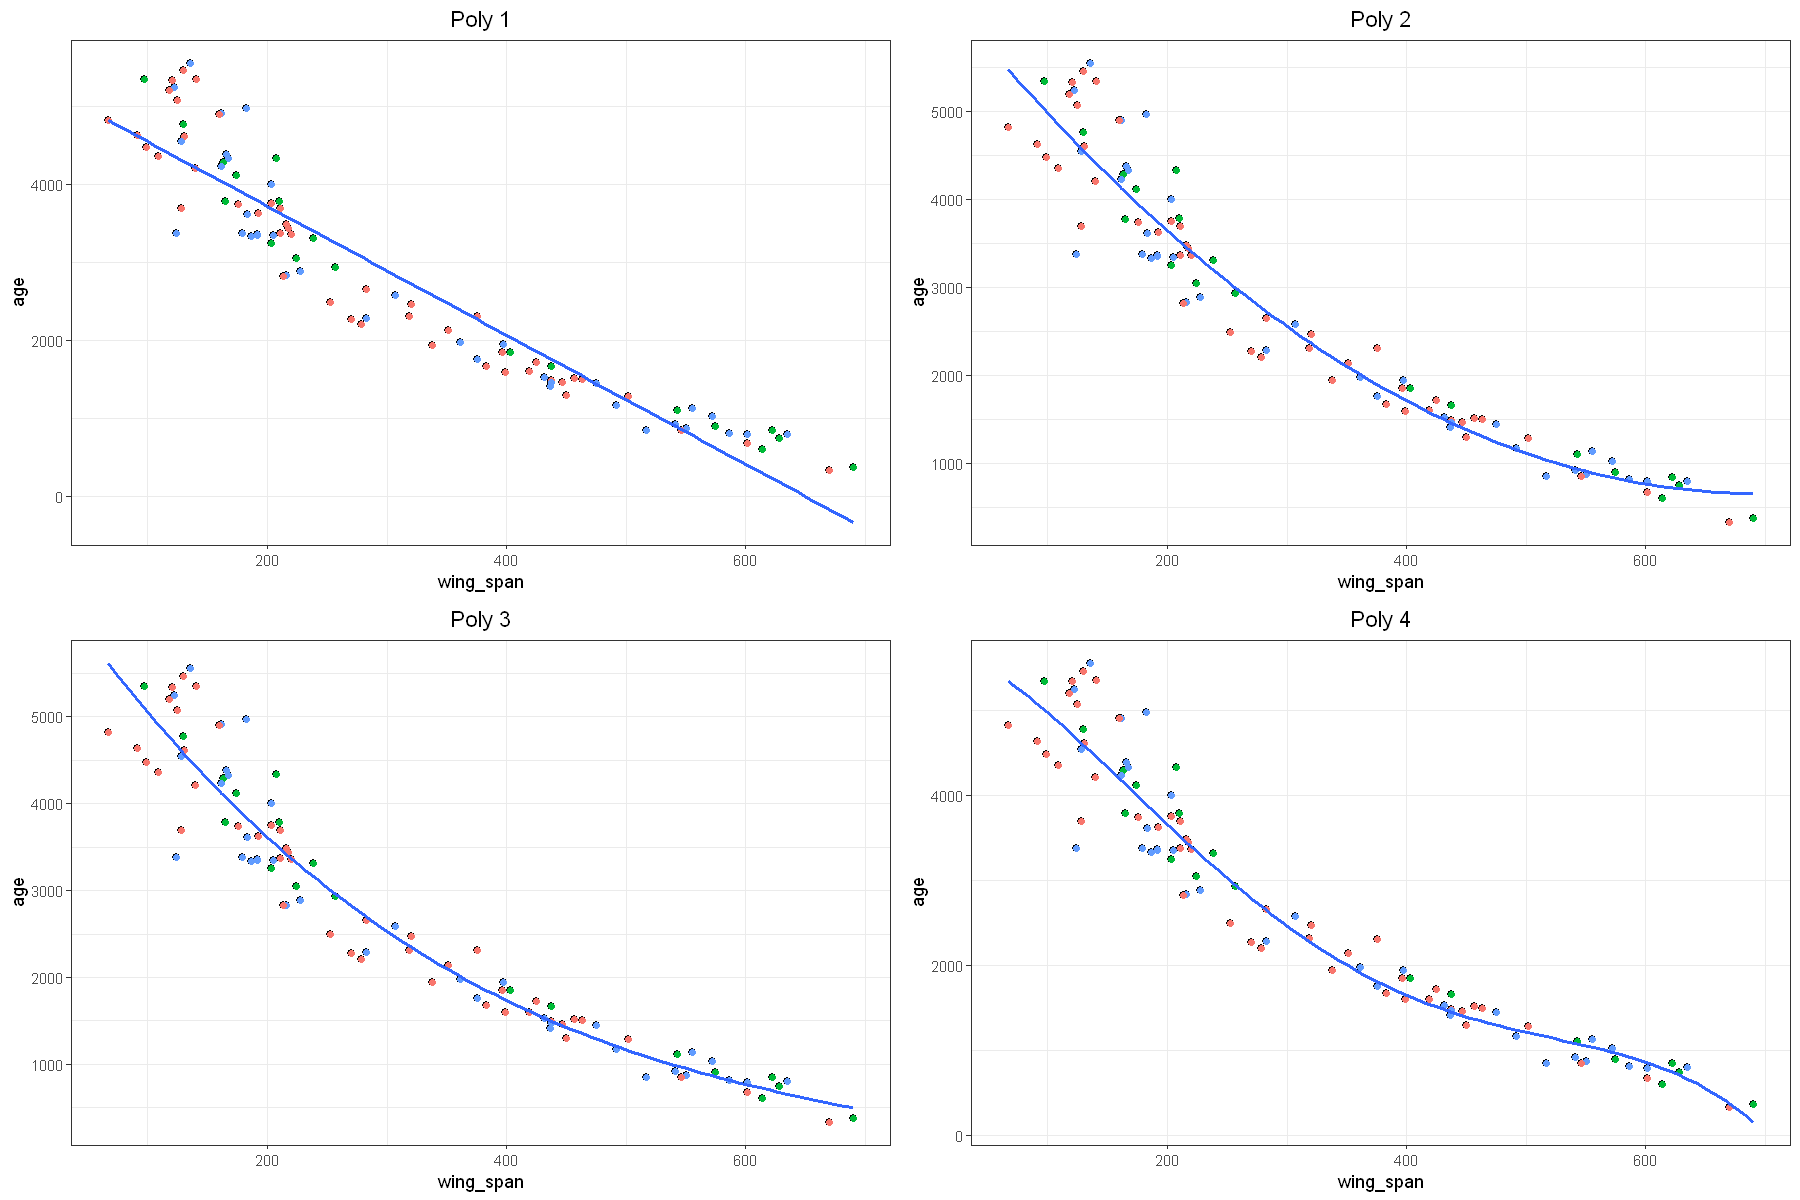

In [4]:
options(repr.plot.width = 15, repr.plot.height = 10)
chart <- ggplot(data, aes(x = wing_span, y = age)) + 
  geom_point(size = 2) +
  geom_point(aes(colour = colour)) +
  theme_bw() +
  theme(legend.position = "none") +
  theme(plot.title = element_text(hjust = 0.5))


# Add polynomials regression line with titles
chart_poly1 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 1), se = FALSE) + ggtitle("Poly 1")
chart_poly2 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 2), se = FALSE) + ggtitle("Poly 2")
chart_poly3 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 3), se = FALSE) + ggtitle("Poly 3")
chart_poly4 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 4), se = FALSE) + ggtitle("Poly 4")

grid.arrange(chart_poly1, chart_poly2, chart_poly3, chart_poly4, ncol = 2)

#### Fire Quotient x No Eggs

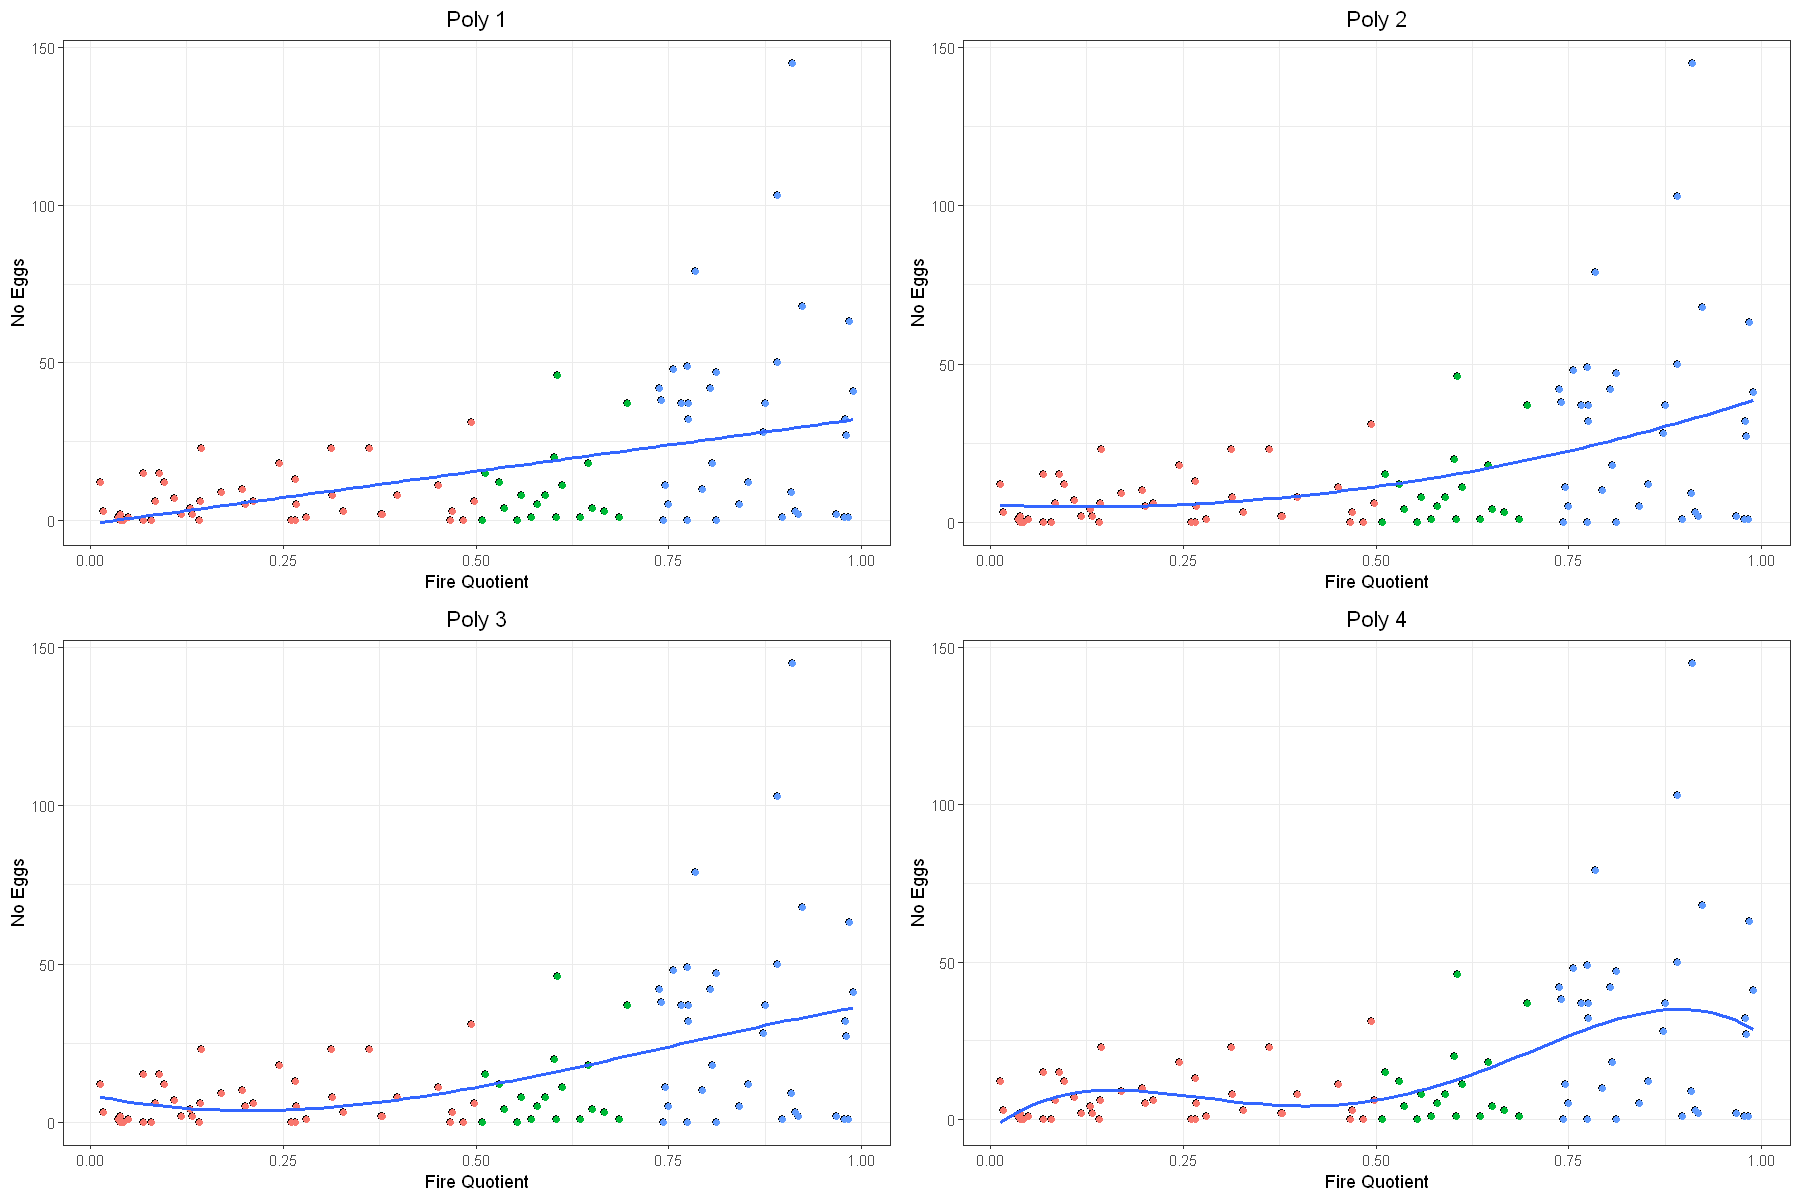

In [5]:
options(repr.plot.width = 15, repr.plot.height = 10)
chart <- ggplot(data = data, aes(x = fire_quotient, y = no_eggs)) +
  geom_point(size = 2) +
  geom_point(aes(color = colour)) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Fire Quotient", y = "No Eggs") +
  theme(plot.title = element_text(hjust = 0.5))

# Add polynomials regression line with titles
chart_poly1 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 1), se = FALSE) + ggtitle("Poly 1")
chart_poly2 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 2), se = FALSE) + ggtitle("Poly 2")
chart_poly3 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 3), se = FALSE) + ggtitle("Poly 3")
chart_poly4 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 4), se = FALSE) + ggtitle("Poly 4")

grid.arrange(chart_poly1, chart_poly2, chart_poly3, chart_poly4, ncol = 2)

#### Age x No Eggs

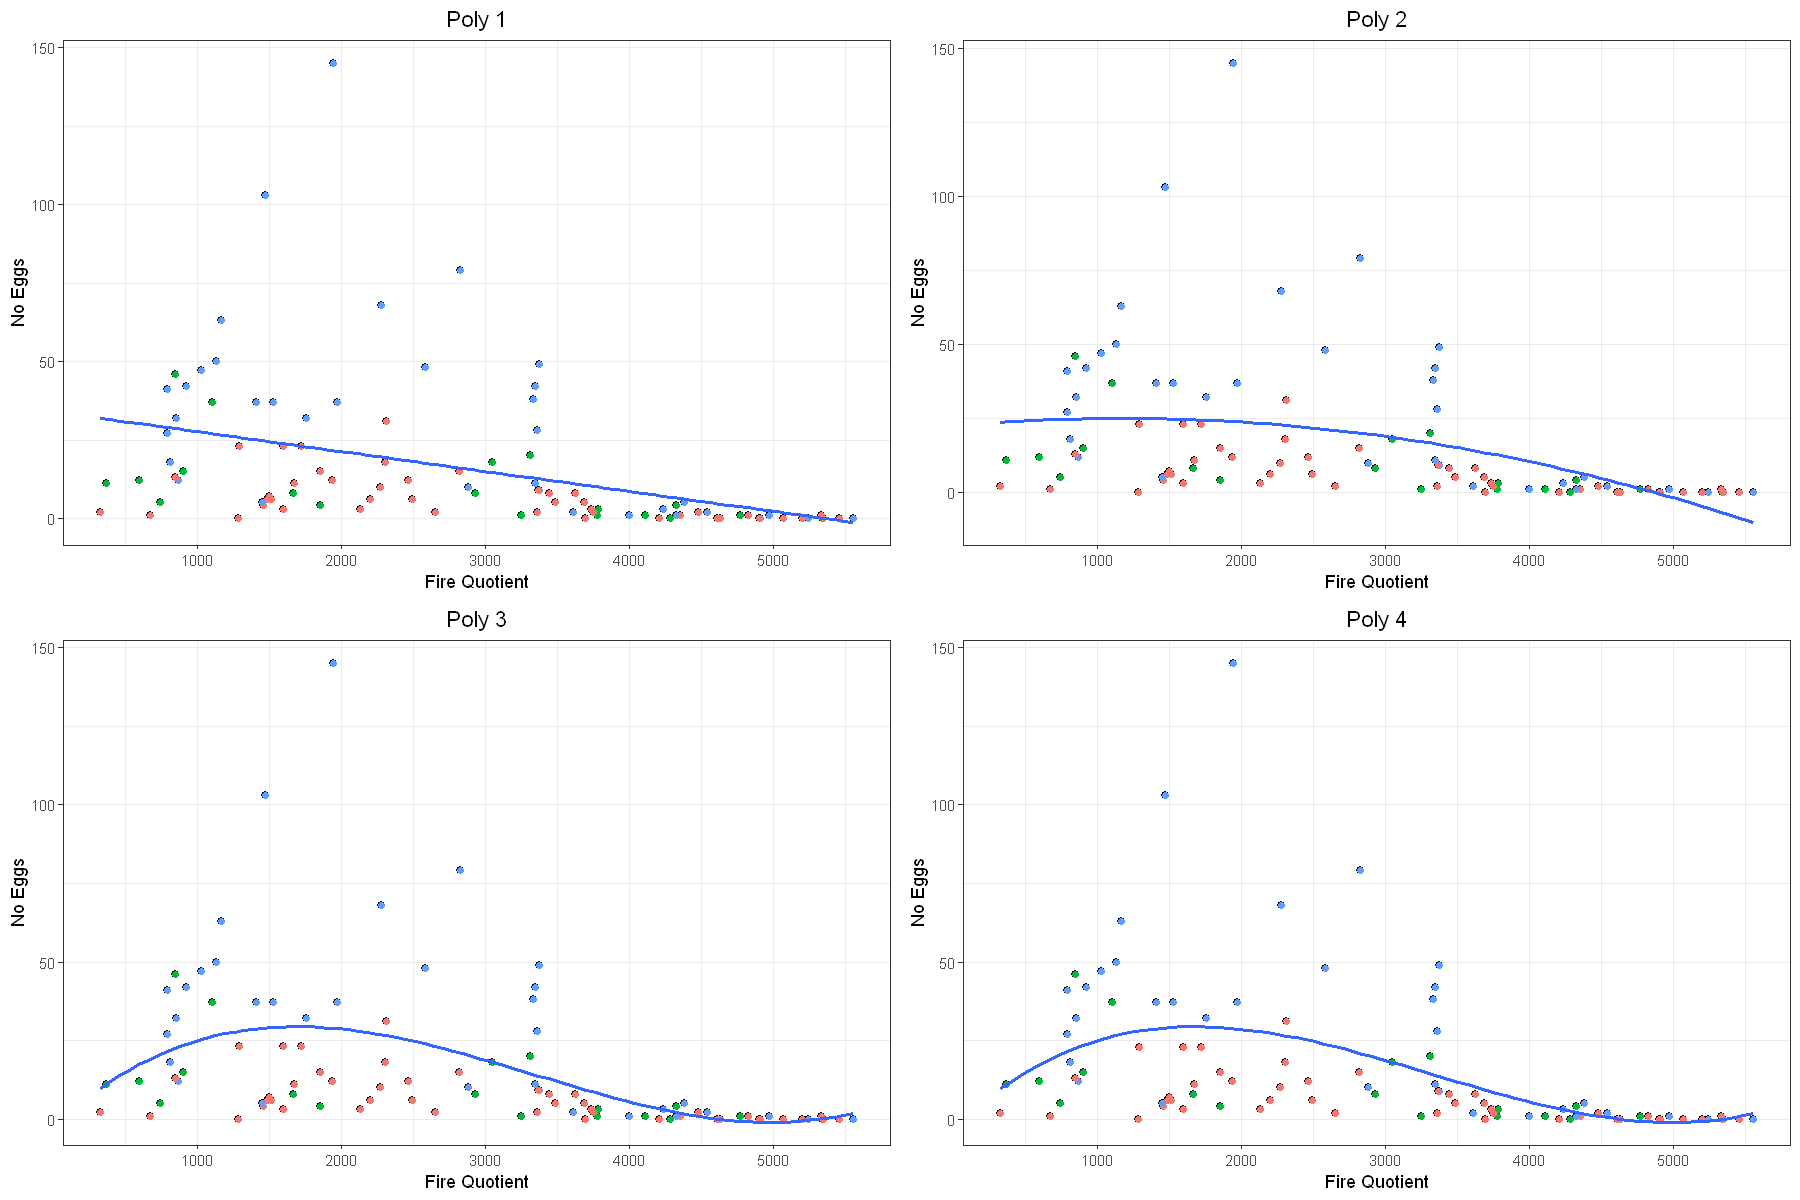

In [6]:
options(repr.plot.width = 15, repr.plot.height = 10)
chart <- ggplot(data = data, aes(x = age, y = no_eggs)) +
  geom_point(size = 2) +
  geom_point(aes(color = colour)) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Fire Quotient", y = "No Eggs") +
  theme(plot.title = element_text(hjust = 0.5))

# Add polynomials regression line with titles
chart_poly1 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 1), se = FALSE) + ggtitle("Poly 1")
chart_poly2 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 2), se = FALSE) + ggtitle("Poly 2")
chart_poly3 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 3), se = FALSE) + ggtitle("Poly 3")
chart_poly4 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 4), se = FALSE) + ggtitle("Poly 4")

grid.arrange(chart_poly1, chart_poly2, chart_poly3, chart_poly4, ncol = 2)

#### Wing Span x No Eggs

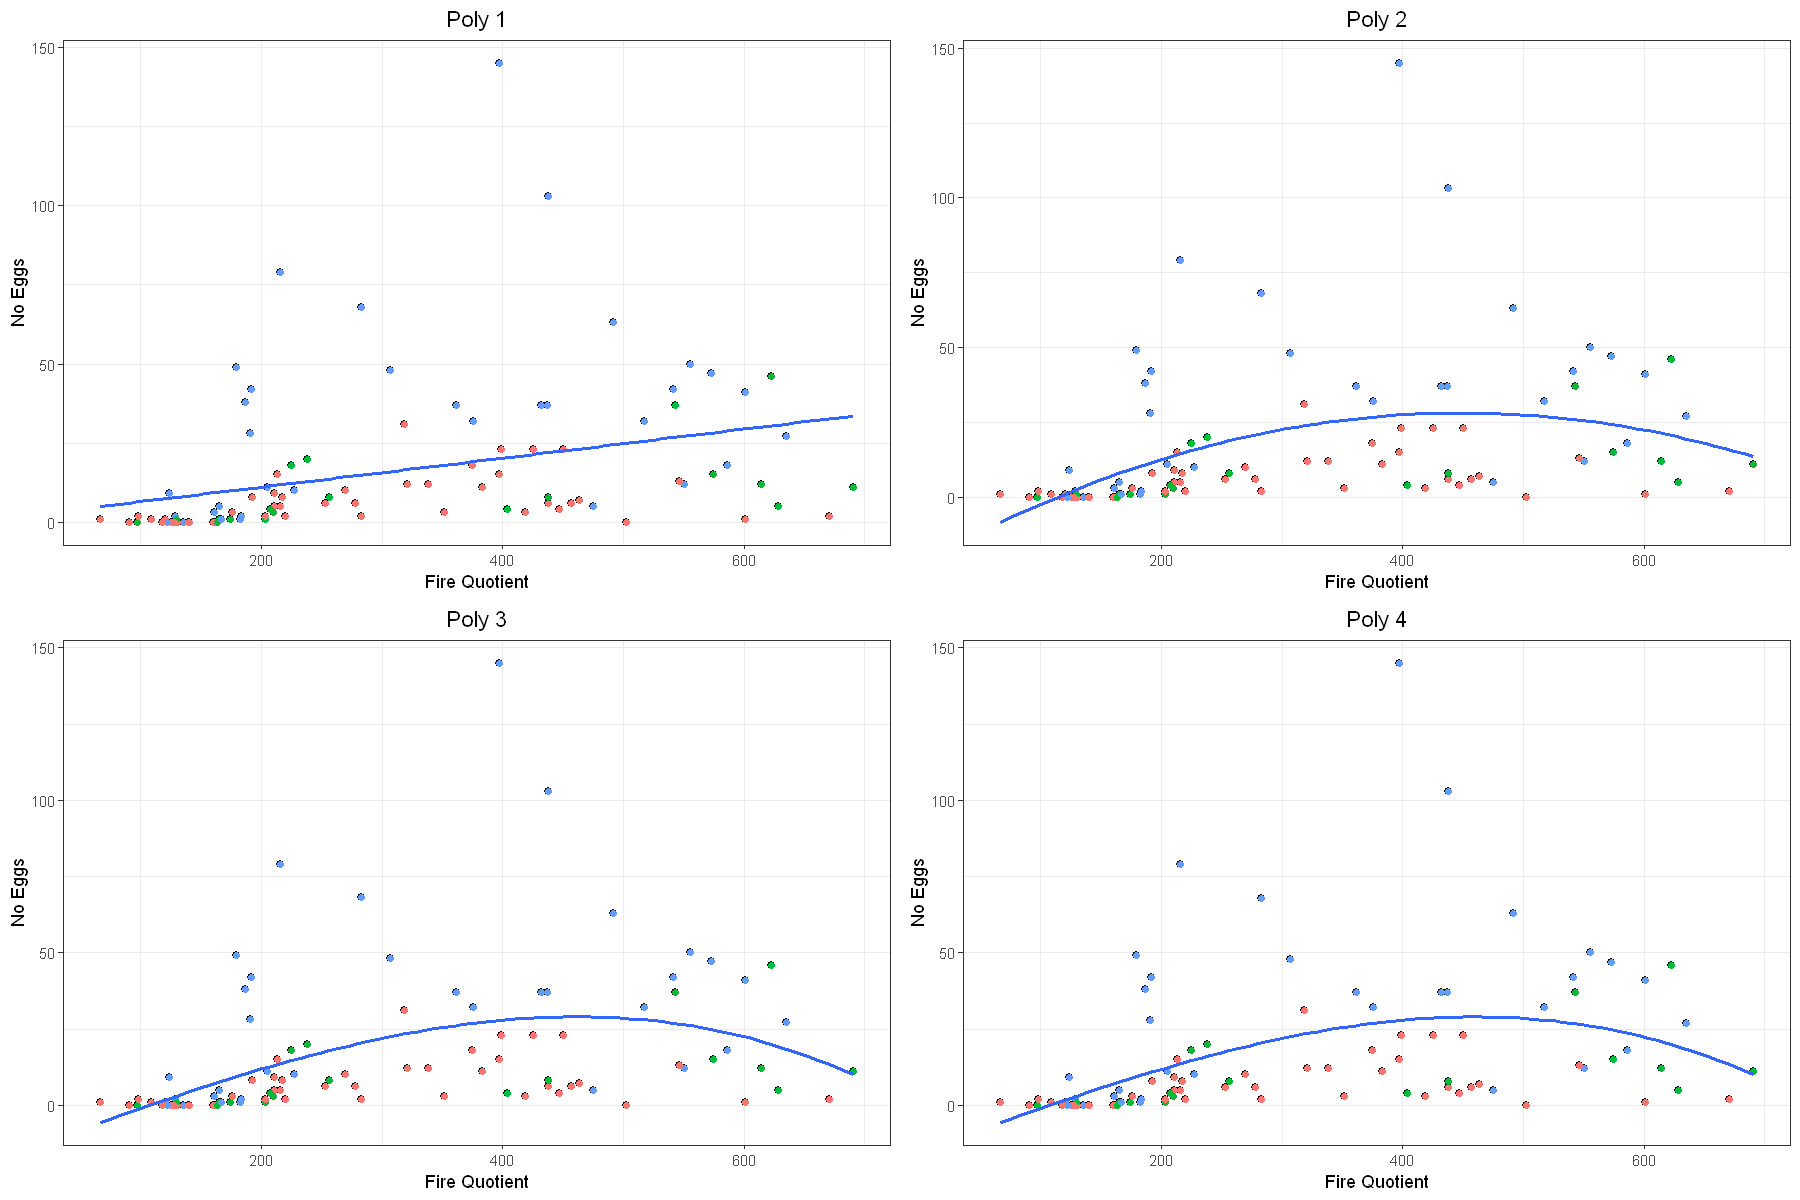

In [7]:
options(repr.plot.width = 15, repr.plot.height = 10)
chart <- ggplot(data = data, aes(x = wing_span, y = no_eggs)) +
  geom_point(size = 2) +
  geom_point(aes(color = colour)) +
  theme_bw() +
  theme(legend.position = "none") +
  labs(x = "Fire Quotient", y = "No Eggs") +
  theme(plot.title = element_text(hjust = 0.5))

# Add polynomials regression line with titles
chart_poly1 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 1), se = FALSE) + ggtitle("Poly 1")
chart_poly2 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 2), se = FALSE) + ggtitle("Poly 2")
chart_poly3 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 3), se = FALSE) + ggtitle("Poly 3")
chart_poly4 <- chart + geom_smooth(method = "glm", formula = y ~ poly(x, 4), se = FALSE) + ggtitle("Poly 4")

grid.arrange(chart_poly1, chart_poly2, chart_poly3, chart_poly4, ncol = 2)

### Testing Models

Variável de resposta y: no_eggs

- Esta é a variável que estamos tentando modelar e prever. Representa o número de ovos.

GLM:

- Os GLMs são adequados quando a variável de resposta não segue uma distribuição normal, que é a suposição dos LMs. Os GLMs permitem diferentes tipos de distribuições de resposta, como Poisson, binomial ou gama, que podem lidar com dados de contagem, dados binários ou dados contínuos não negativos, respectivamente.

- Não linearidade: os GLMs podem lidar com relacionamentos não lineares entre os preditores e a variável de resposta. Usando funções de link apropriadas em GLMs, você pode modelar relacionamentos complexos, como relações logarítmicas, exponenciais ou de potência, que não podem ser capturados por LMs.

Polynomial:

- k = 2, pois gera boa aproximação com os dados em todas as relações com "no_eggs"

In [151]:
model_ic <- function(model) {
    return(c(AIC(model), BIC(model), AICc(model)))
}

# Bias
bias <- function(y, y_hat) {
    return(
        mean(y_hat - y)
    )
}

#Root Mean Squared Error
rmse <- function(y, y_hat) {
    return(
        sqrt(sum((y_hat - y)**2) / length(y))
    )
}

# Mean Absolute Error
mae <- function(y, y_hat) {
    return(
        sum(abs(y_hat - y)) / length(y)
    )
}

#Mean Absolute Relative Error
mare <- function(y, y_hat) {
    return(
        sum(abs(y_hat - y) / abs(ifelse(y != 0, y, 0.1))) / length(y)
    )
}

errors <- function(model, data, y) {
    y_hat <- predict(model, newdata = data, type = "response")
    return(c(bias(y, y_hat), rmse(y, y_hat), mae(y, y_hat)))
}

In [152]:
ic_dataframe <- function(models) {
    aic_values <- c()
    bic_values <- c()
    aicc_values <- c()
    for (i in 1:length(models)) {      
        # Calculate evaluation metrics and append to the respective vectors
        result <- model_ic(models[[i]])
        aic_values <- c(aic_values, result[1])
        bic_values <- c(bic_values, result[2])
        aicc_values <- c(aicc_values, result[3])
    }
    df <- data.frame(Model = names(models),
        AIC = aic_values,
        BIC = bic_values,
        AICC = aicc_values)

    df
}

errors_dataframe <- function(models, y, data) {
    bias_values <- c()
    rmse_values <- c()
    mae_values <- c()
    mare_values <- c()
    for (i in 1:length(models)) {
        # Replace the example code with your actual model predictions and actual values
        
        # Generate model-specific variable names
        y_hat <- predict(models[[i]], newdata = data, type = "response")
        # Calculate evaluation metrics and append to the respective vectors
        bias_values <- c(bias_values, bias(y, y_hat))
        rmse_values <- c(rmse_values, rmse(y, y_hat))
        mae_values <- c(mae_values, mae(y, y_hat))
        mare_values <- c(mare_values, mare(y, y_hat))
    }

    df <- data.frame(Model = names(models),
        BIAS = bias_values,
        RMSE = rmse_values,
        MAE = mae_values,
        MARE = mare_values)

    df
}

#### Model 1: Poisson

$y$ = $\alpha$ + $\beta_0$ wing_span + $\beta_1$ age + $\beta_2$ age^2

In [146]:
model1 <- glm(no_eggs ~ wing_span + poly(age, 2),
                data = data, family = poisson(link = "log"))

## poly(age, 2) = I(age) + I(age^2)
ic_dataframe(list(model1 = model1))

Model,AIC,BIC,AICC
<chr>,<dbl>,<dbl>,<dbl>
model1,1849.669,1860.089,1850.09


#### Model 2: Poisson

$y$ = $\alpha$ + $\beta_0$ fire_quotient + $\beta_1$ age + $\beta_2$ age^2

In [153]:
model2 <- glm(no_eggs ~ fire_quotient + poly(age, 2),
                data = data, family = poisson(link = "log"))

# poly(age, 2) = I(age) + I(age^2)
ic_dataframe(list(model2 = model2))

Model,AIC,BIC,AICC
<chr>,<dbl>,<dbl>,<dbl>
model2,1111.614,1122.035,1112.035


#### Model 3: Negative Binomial

$y$ = $\alpha$ + $\beta_0$ age + $\beta_1$ fire_quotient + $\beta_2$ fire_quotient^2

In [154]:
model3 <- glm(no_eggs ~ age + poly(fire_quotient, 2),
                data = data, family = negative.binomial(theta = 2, link = "log"))

ic_dataframe(list(model2 = model3))

Model,AIC,BIC,AICC
<chr>,<dbl>,<dbl>,<dbl>
model2,691.6373,702.058,692.0584


#### Model 4: Negative Binomial

$y$ = $\alpha$ + $\beta_0$ wing_span + $\beta_1$ age + $\beta_2$ age^2

In [155]:
model4 <- glm(no_eggs ~ wing_span + poly(age, 2),
                data = data, family = negative.binomial(theta = 2, link = "log"))

ic_dataframe(list(model4 = model4))

Model,AIC,BIC,AICC
<chr>,<dbl>,<dbl>,<dbl>
model4,677.4458,687.8665,677.8669


#### Answer Model: Negative Binomial

y$ = $\alpha$ + $\beta_0$ fire_quotient + $\beta_1$ age + $\beta_2$ age^2

alpha <- .2

beta0 <- 2

beta1 <- 0.002

beta2 <- -.0000005

In [156]:
model_answer <- glm(no_eggs ~ fire_quotient + I(age) + I(age^2),
                data = data, family = negative.binomial(theta = 2, link = "log"))

ic_dataframe(list(answer = model_answer))

Model,AIC,BIC,AICC
<chr>,<dbl>,<dbl>,<dbl>
answer,615.5789,625.9996,616


In [14]:
summary(model_answer)


Call:
glm(formula = no_eggs ~ fire_quotient + I(age) + I(age^2), family = negative.binomial(theta = 2, 
    link = "log"), data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4628  -1.0238  -0.1840   0.4374   1.9303  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.519e-01  4.045e-01   0.376    0.708    
fire_quotient  2.264e+00  2.772e-01   8.169 1.24e-12 ***
I(age)         1.990e-03  3.228e-04   6.165 1.66e-08 ***
I(age^2)      -5.062e-07  6.301e-08  -8.034 2.40e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(2) family taken to be 0.9809861)

    Null deviance: 348.36  on 99  degrees of freedom
Residual deviance: 101.02  on 96  degrees of freedom
AIC: 615.58

Number of Fisher Scoring iterations: 6


#### IC Comparison on Dataframe

In [163]:
models <- list(model1 = model1, model2 = model2, model3 = model3, model4 = model4, answer = model_answer)
ic_dataframe(models)

Model,AIC,BIC,AICC
<chr>,<dbl>,<dbl>,<dbl>
model1,1849.6686,1860.0893,1850.0897
model2,1111.6139,1122.0346,1112.0350
model3,691.6373,702.0580,692.0584
model4,677.4458,687.8665,677.8669
answer,615.5789,625.9996,616.0000


### Testing Models on "Dannys_dragons.csv"

In [112]:
y <- data_dannys$no_eggs

In [167]:
y_hat <- predict(model1, newdata = data_dannys, type = "response")

errors_dataframe(list(model1=model1), y, data_dannys)

Model,BIAS,RMSE,MAE,MARE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
model1,5.212125,8.88033,6.16647,3.31908


In [166]:
y_hat <- predict(model2, newdata = data_dannys, type = "response")

errors_dataframe(list(model2=model2), y, data_dannys)

Model,BIAS,RMSE,MAE,MARE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
model2,2.964222,7.679251,5.310064,1.558886


In [165]:
y_hat <- predict(model3, newdata = data_dannys, type = "response")

errors_dataframe(list(model3=model3), y, data_dannys)

Model,BIAS,RMSE,MAE,MARE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
model3,2.581825,11.1667,6.65564,8.054565


In [164]:
y_hat <- predict(model4, newdata = data_dannys, type = "response")

errors_dataframe(list(model4=model4), y, data_dannys)

Model,BIAS,RMSE,MAE,MARE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
model4,5.825339,9.615985,6.648362,2.775434


#### Testing Answer Model on "Dannys_dragons.csv"

In [159]:
y_hat <- predict(model_answer, newdata = data_dannys, type = "response")

errors_dataframe(list(answer=model_answer), y, data_dannys)

Model,BIAS,RMSE,MAE,MARE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
answer,2.834833,7.218946,5.063655,1.602196


#### Erros Comparison on Dataframe 

In [157]:
errors_dataframe(models, y, data_dannys)

Model,BIAS,RMSE,MAE,MARE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
model1,5.212125,8.880330,6.166470,3.319080
model2,2.964222,7.679251,5.310064,1.558886
model3,2.581825,11.166698,6.655640,8.054565
model4,5.825339,9.615985,6.648362,2.775434
answer,2.834833,7.218946,5.063655,1.602196
